b) (3 pts) In Python, directly minimize the objective L without any sparsity-inducing regulariza- tion/constraint. Plot the value of log(L) vs. #steps throughout the training, and use another figure to plot how the value of each element in W is changing throughout the training. From your result, is W converging to an optimal solution? Is W converging to a sparse solution?

$$
W^{(k+1)} = W^k - 2\mu \sum_{i=1}^{3} X_i^T (X_i W - y_i)
$$

$X_1 = [-2, 2, 1, -1, -1], \quad y_1 = 5$

$X_2 = [-2, 1, -2, 0, 1], \quad y_2 = 1$

$X_3 = [1, 0, -2, 2, -1], \quad y_3 = 1$  



In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
X = np.array([[-2, 2, 1, -1, -1], 
              [-2, 1, -2, 0, 1], 
              [1, 0, -2, 2, -1]])

y = np.array([5, 1, 1])
lr = 0.02
steps = 200
W = np.zeros(5)

loss_history = []
weight_history = []

for step in range(steps):

    loss = np.sum((np.dot(X, W) - y)**2)
    loss_history.append(loss)
    
    weight_history.append(W.copy())
    
    W = W - 2 * lr * np.dot(X.T, (np.dot(X, W) - y))

weight_history = np.array(weight_history)


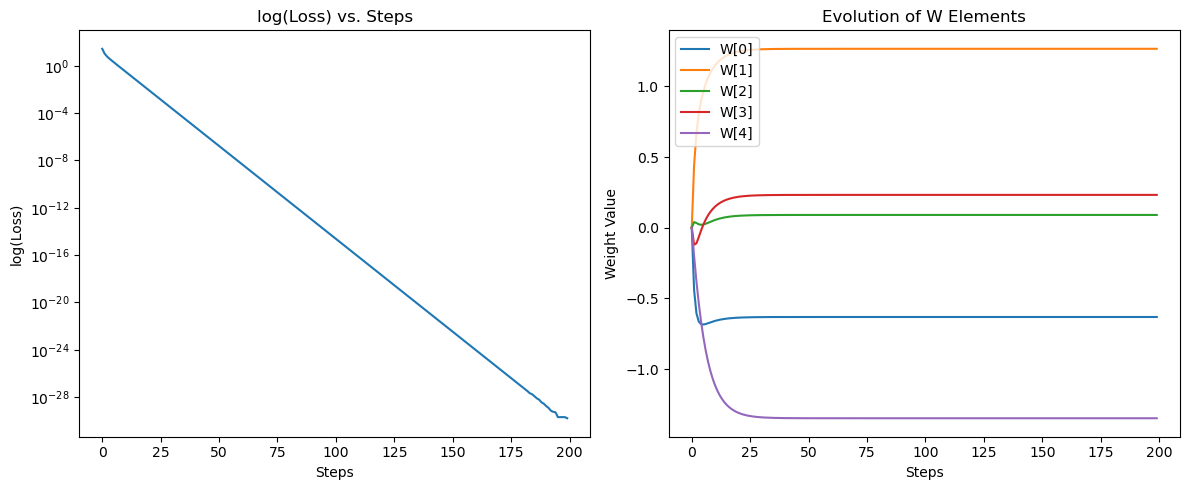

In [3]:
plt.figure(figsize=(12, 5))  

plt.subplot(1, 2, 1)
plt.plot(range(steps), loss_history)
plt.yscale('log')
plt.xlabel('Steps')
plt.ylabel('log(Loss)')
plt.title('log(Loss) vs. Steps')

plt.subplot(1, 2, 2)
for i in range(5):
    plt.plot(range(steps), weight_history[:, i], label=f'W[{i}]')
plt.xlabel('Steps')
plt.ylabel('Weight Value')
plt.title('Evolution of W Elements')
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
weight_history[-1]

array([-0.63143255,  1.26564673,  0.09040334,  0.23226704, -1.34770515])

(c) (6 pts) Since we have the knowledge that the ground-truth weight should have ||W ||0 ≤ 2, we can apply projected gradient descent to enforce this sparse constraint. Redo the optimization process in (b), this time prune the elements in W after every gradient descent step to ensure ||Wl||0 ≤ 2. Plot the value of log(L) throughout the training, and use another figure to plot the value of each element in W in each step. From your result, is W converging to an optimal solution? Is W converging to a sparse solution?


In [5]:
W = np.zeros(5)
loss_history = []
weight_history = []

for step in range(steps):
   loss = np.sum((np.dot(X, W) - y)**2)
   loss_history.append(loss)
   weight_history.append(W.copy())
   
   gradient = 2 * np.dot(X.T, (np.dot(X, W) - y))
   W = W - lr * gradient
   
   if np.count_nonzero(W) > 2:
       indices = np.argsort(np.abs(W))
       W[indices[:-2]] = 0
       
weight_history = np.array(weight_history)

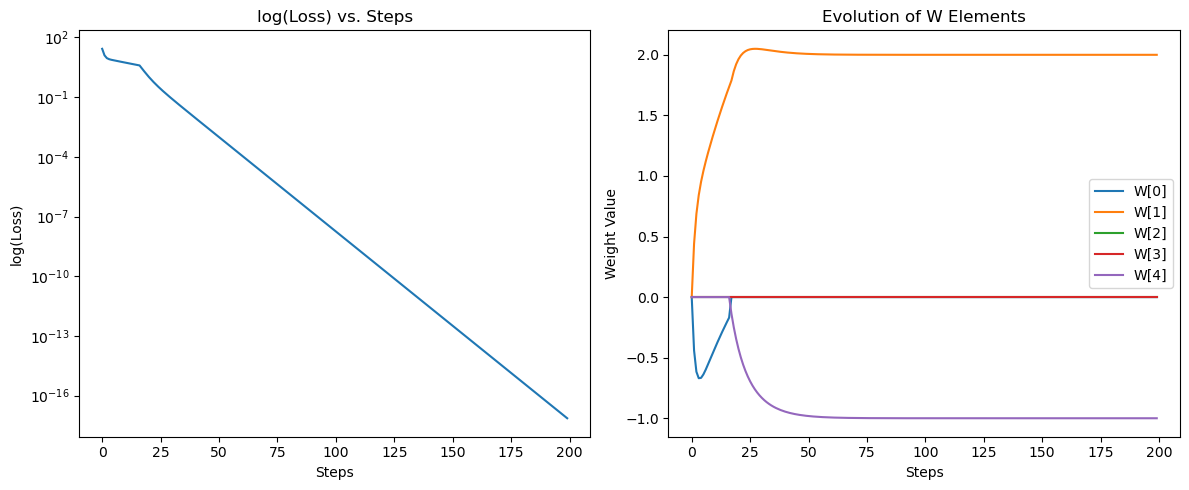

In [6]:
plt.figure(figsize=(12, 5))  

plt.subplot(1, 2, 1)

plt.plot(range(steps), loss_history)
plt.yscale('log') 
plt.xlabel('Steps')
plt.ylabel('log(Loss)')
plt.title('log(Loss) vs. Steps')

plt.subplot(1, 2, 2)
for i in range(5):
    plt.plot(range(steps), weight_history[:, i], label=f'W[{i}]')
plt.xlabel('Steps')
plt.ylabel('Weight Value')
plt.title('Evolution of W Elements')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
weight_history[-1]

array([ 0.,  2.,  0.,  0., -1.])

d) (5 pts) In this problem we apply l1 regularization to induce the sparse solution. The minimization objective therefore changes to L + λ||W ||1. Please use full-batch gradient descent to minimize this objective, with λ = {0.2, 0.5, 1.0, 2.0} respectively. For each case, plot the value of log(L) throughout the training, and use another figure to plot the value of each element in W in each step. From your result, comment on the convergence performance under different λ.

In [ ]:
lambda_values = [0.2, 0.5, 1.0, 2.0]

all_loss_history = []
all_weight_history = []
for lambda_val in lambda_values:
    W = np.zeros(5)
    loss_history = []
    weight_history = []

    for step in range(steps):
        predictions = X @ W
        residuals = predictions - y
        
        mse_loss = np.sum(residuals**2)
        l1_norm = lambda_val * np.sum(np.abs(W))
        loss = mse_loss + l1_norm
        
        loss_history.append(mse_loss)  
        weight_history.append(W.copy())
        
        grad_mse = 2 * X.T @ residuals
        grad_l1 = lambda_val * np.sign(W)
        
        W = W - lr * (grad_mse + grad_l1)
    
    weight_history = np.array(weight_history)
    all_loss_history.append(loss_history)
    all_weight_history.append(weight_history)

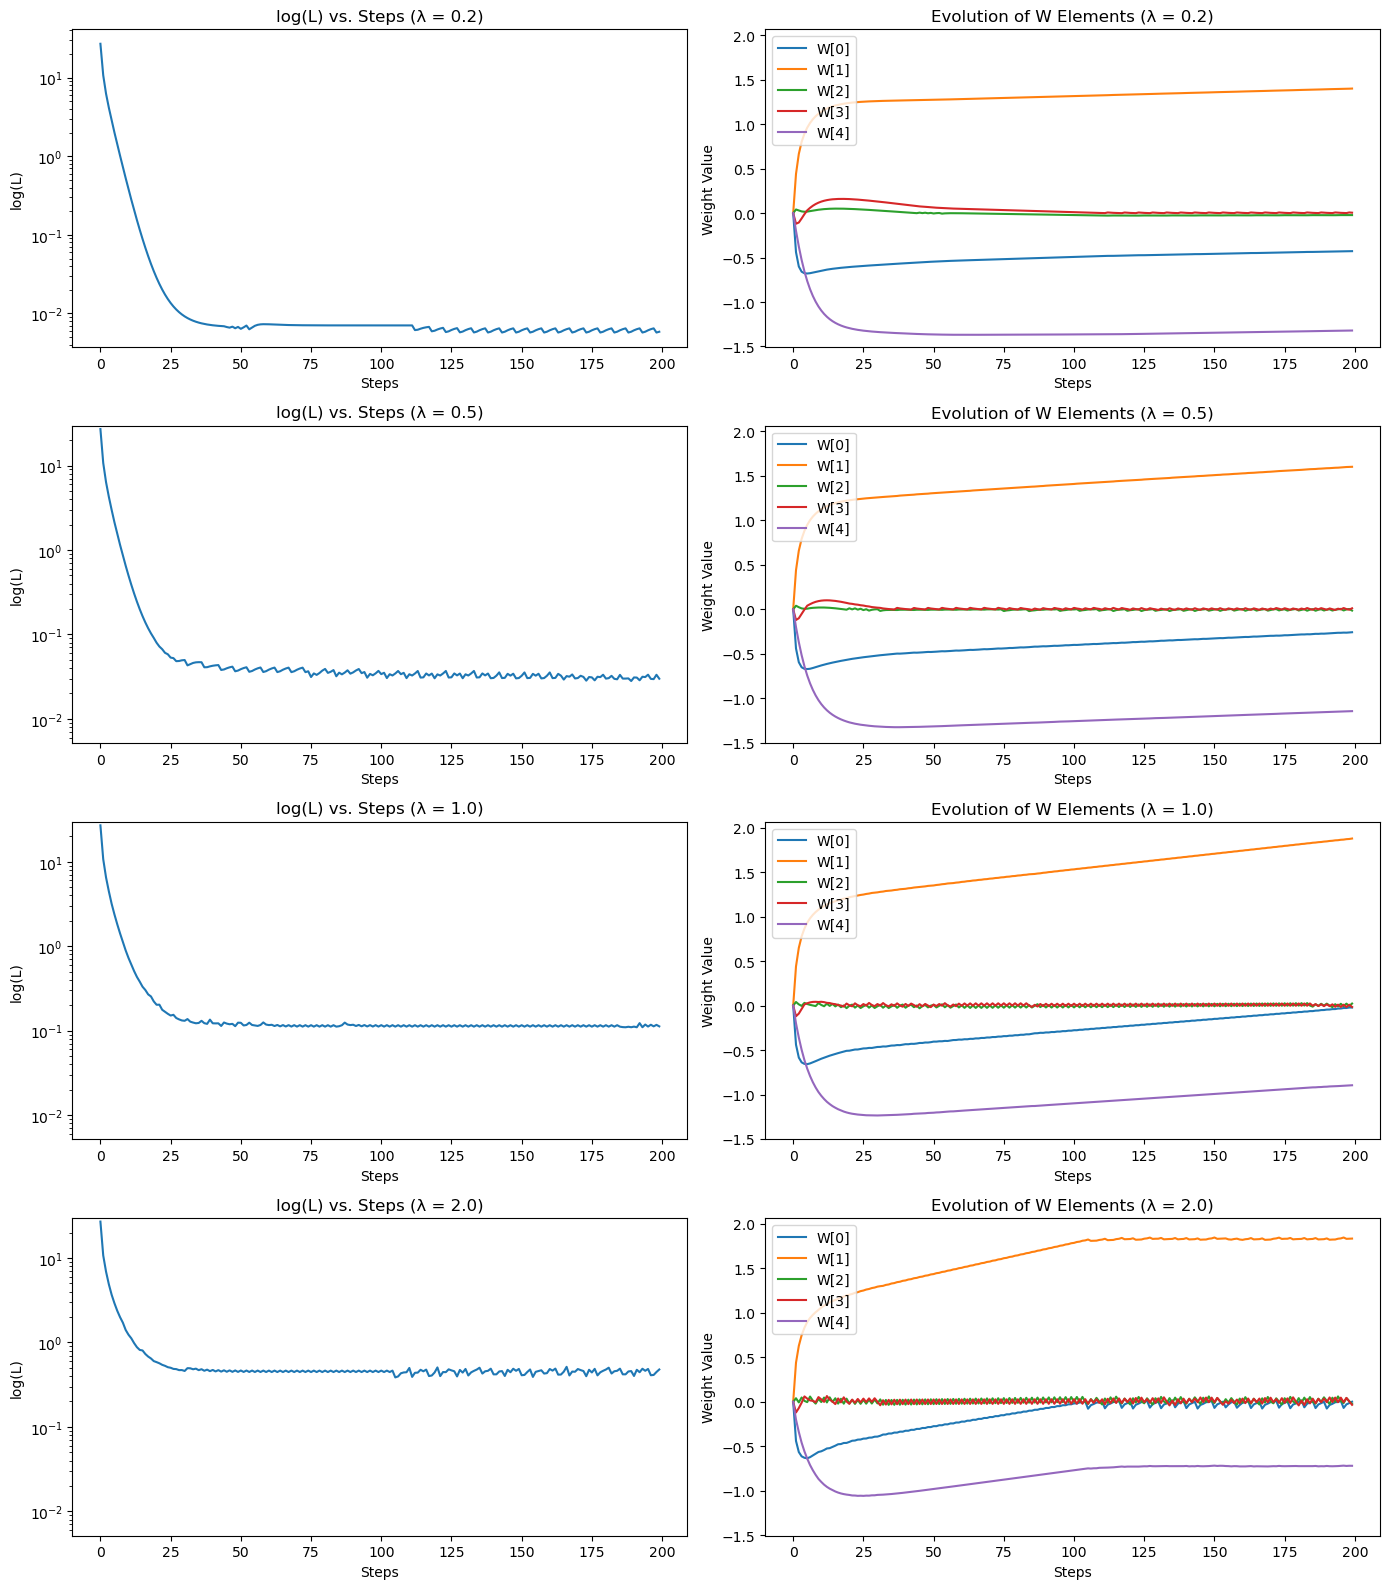

In [ ]:
min_loss = min([min(losses) for losses in all_loss_history])
max_loss = max([max(losses) for losses in all_loss_history])

min_weight = min([np.min(weights) for weights in all_weight_history])
max_weight = max([np.max(weights) for weights in all_weight_history])

fig, axs = plt.subplots(len(lambda_values), 2, figsize=(14, 4*len(lambda_values)))

for idx, lambda_val in enumerate(lambda_values):
    loss_history = all_loss_history[idx]
    weight_history = all_weight_history[idx]
    
    # log(L)
    axs[idx, 0].plot(range(steps), loss_history)
    axs[idx, 0].set_yscale('log')  
    axs[idx, 0].set_xlabel('Steps')
    axs[idx, 0].set_ylabel('log(L)')
    axs[idx, 0].set_title(f'log(L) vs. Steps (λ = {lambda_val})')
    
    if idx > 0:  
        axs[idx, 0].set_ylim([min_loss * 0.9, max_loss * 1.1])
    
    # Weight
    for i in range(weight_history.shape[1]):
        axs[idx, 1].plot(range(steps), weight_history[:, i], label=f'W[{i}]')
    axs[idx, 1].set_xlabel('Steps')
    axs[idx, 1].set_ylabel('Weight Value')
    axs[idx, 1].set_title(f'Evolution of W Elements (λ = {lambda_val})')
    axs[idx, 1].legend()

    axs[idx, 1].set_ylim([min_weight * 1.1, max_weight * 1.1])

plt.tight_layout()
plt.show()


(e) (6pts)Here weo ptimize the same objective as in(d), this time using proximal gradient update. Recall that the proximal operator of the l1 regularizer is the soft thresholding function. Set the threshold in the soft thresholding function to {0.004, 0.01, 0.02, 0.04} respectively. Plot the value of log(L) throughout the training, and use another figure to plot the value of each element in W in each step. Compare the convergence performance with the results in (d). (Hint: Optimizing L + λ||W ||1 using gradient descent with learning rate μ should correspond to proximal gradient update with threshold μλ)

In [10]:
threshold_values = [0.004, 0.01, 0.02, 0.04]

all_loss_history = []
all_weight_history = []

for threshold in threshold_values:
    W = np.zeros(5)
    loss_history = []
    weight_history = []
    
    for step in range(steps):
        predictions = X @ W
        residuals = predictions - y
        
        mse_loss = np.sum(residuals**2)
        loss_history.append(mse_loss)
        weight_history.append(W.copy())
        
        grad_mse = 2 * X.T @ residuals
        
        W_temp = W - lr * grad_mse
        
        W = np.sign(W_temp) * np.maximum(np.abs(W_temp) - threshold, 0)
    
    weight_history = np.array(weight_history)
    all_loss_history.append(loss_history)
    all_weight_history.append(weight_history)

min_loss = min([min(losses) for losses in all_loss_history])
max_loss = max([max(losses) for losses in all_loss_history])

min_weight = min([np.min(weights) for weights in all_weight_history])
max_weight = max([np.max(weights) for weights in all_weight_history])



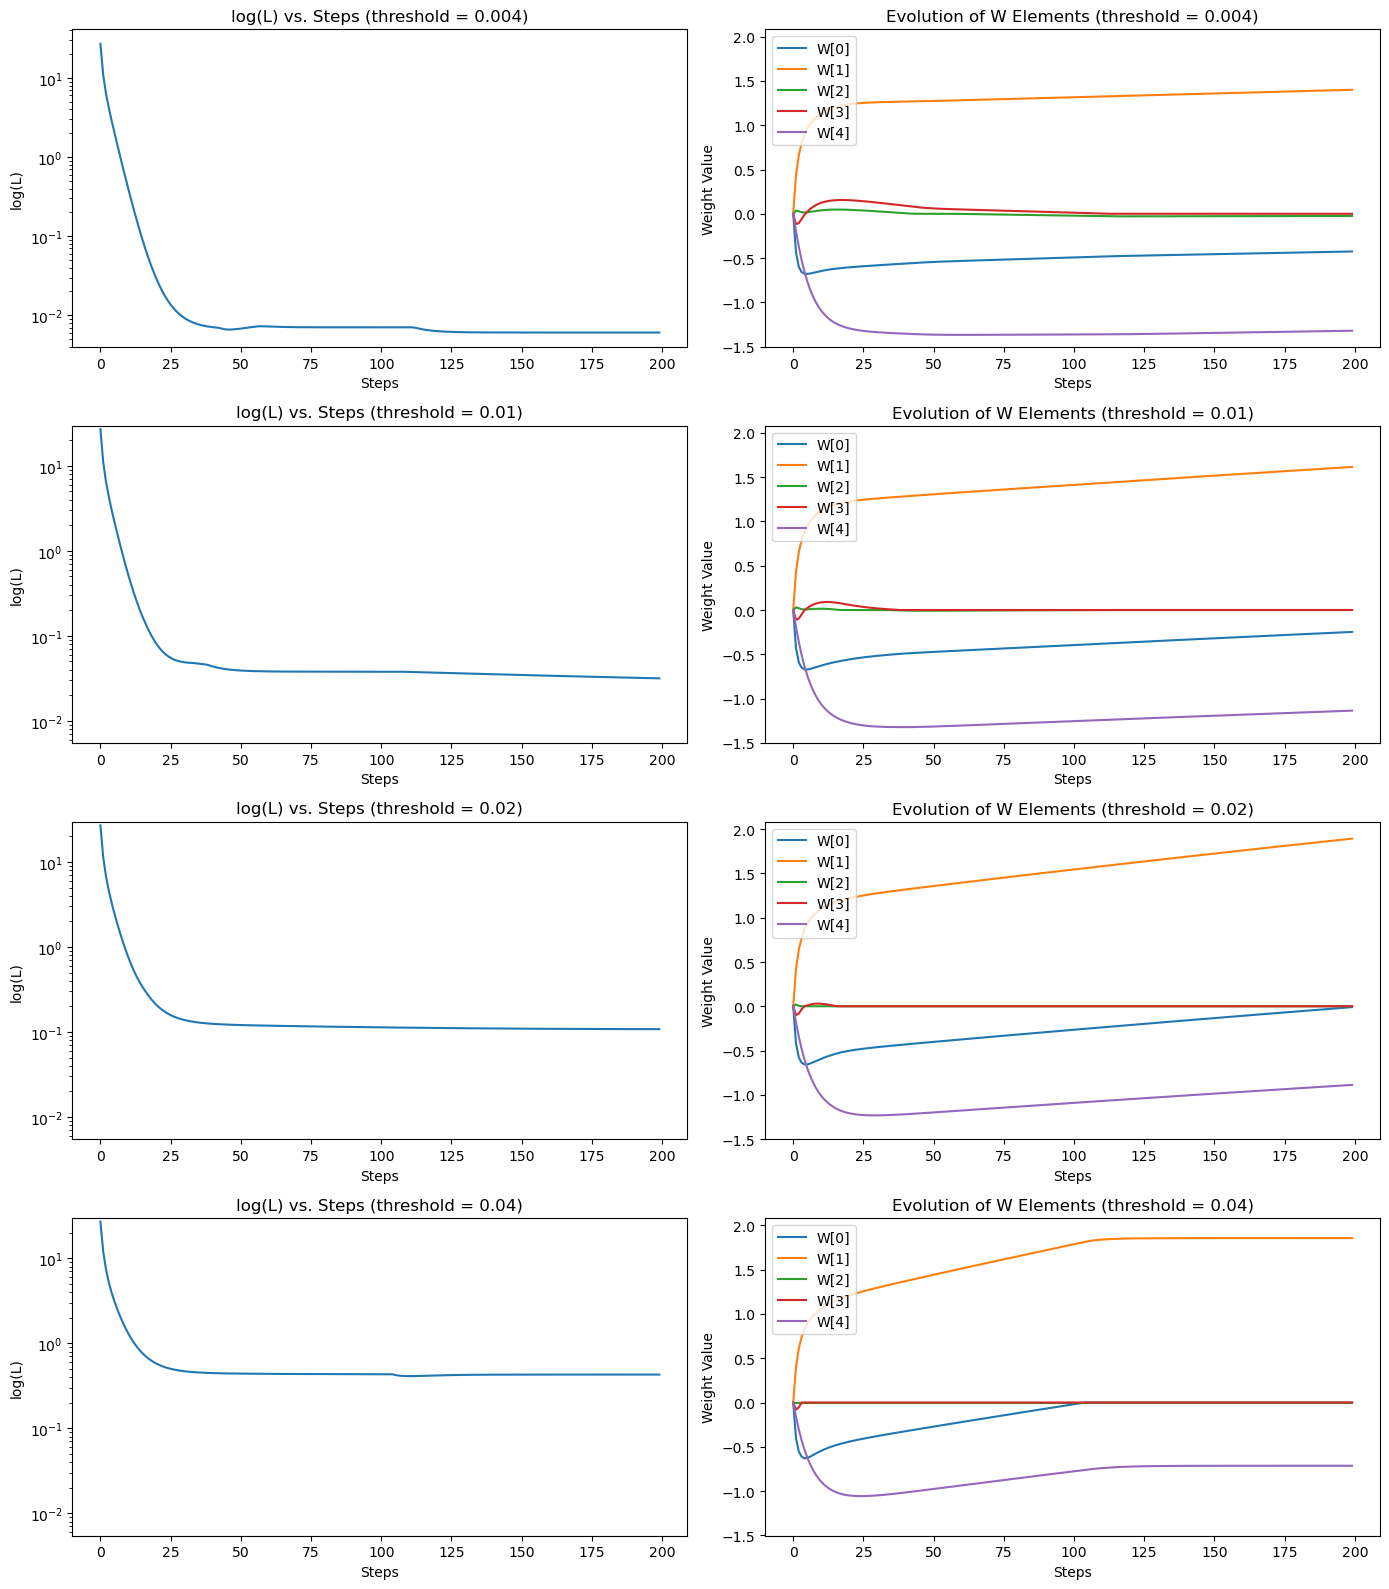

In [11]:
fig, axs = plt.subplots(len(threshold_values), 2, figsize=(14, 4*len(threshold_values)))

for idx, threshold in enumerate(threshold_values):
    loss_history = all_loss_history[idx]
    weight_history = all_weight_history[idx]
    
    axs[idx, 0].plot(range(steps), loss_history)
    axs[idx, 0].set_yscale('log')
    axs[idx, 0].set_xlabel('Steps')
    axs[idx, 0].set_ylabel('log(L)')
    axs[idx, 0].set_title(f'log(L) vs. Steps (threshold = {threshold})')
    
    if idx > 0:
        axs[idx, 0].set_ylim([min_loss * 0.9, max_loss * 1.1])
    
    for i in range(weight_history.shape[1]):
        axs[idx, 1].plot(range(steps), weight_history[:, i], label=f'W[{i}]')
    axs[idx, 1].set_xlabel('Steps')
    axs[idx, 1].set_ylabel('Weight Value')
    axs[idx, 1].set_title(f'Evolution of W Elements (threshold = {threshold})')
    axs[idx, 1].legend()

    axs[idx, 1].set_ylim([min_weight * 1.1, max_weight * 1.1])

plt.tight_layout()
plt.show()

f) (6 pts) Trimmed l1 (Tl1) regularizer is proposed to solve the “bias” problem of l1. For simplicity you may implement the T l1 regularizer as applying a l1 regularization with strength λ on the 3 elements of W with the smallest absolute value, with no penalty on other elements. Minimize L + λT l1 (W ) using proximal gradient update with λ = {1.0, 2.0, 5.0, 10.0} (correspond the soft thresholding threshold {0.02, 0.04, 0.1, 0.2}). Plot the value of log(L) throughout the training, and use another figure to plot the value of each element in W in each step. Comment on the convergence comparison of the Trimmed l1 and the l1. Also compare the behavior of the early steps (e.g. first 20) between the Trimmed l1 and the iterative pruning.

In [12]:
lambda_values = [1.0, 2.0, 5.0, 10.0]
threshold_values = [lr * lam for lam in lambda_values]

all_loss_history = []
all_weight_history = []

W_pruning = np.zeros(5)
pruning_loss_history = []
pruning_weight_history = []

for i in range(steps):
    predictions = X @ W_pruning
    residuals = predictions - y
    
    mse_loss = np.sum(residuals**2)
    pruning_loss_history.append(mse_loss)
    pruning_weight_history.append(W_pruning.copy())
    
    grad_mse = 2 * X.T @ residuals
    W_pruning = W_pruning - lr * grad_mse
    
    indices = np.argsort(np.abs(W_pruning))
    W_pruning[indices[:-2]] = 0

for threshold in threshold_values:
    W = np.zeros(5)
    loss_history = []
    weight_history = []
    
    for step in range(steps):
        predictions = X @ W
        residuals = predictions - y
        
        mse_loss = np.sum(residuals**2)
        loss_history.append(mse_loss)
        weight_history.append(W.copy())
        
        grad_mse = 2 * X.T @ residuals
        
        W_temp = W - lr * grad_mse
        
        k = 2
        largest_indices = np.argsort(np.abs(W_temp))[-k:]
        smallest_indices = np.argsort(np.abs(W_temp))[:-k]
        
        W = W_temp.copy()
        W[smallest_indices] = np.sign(W_temp[smallest_indices]) * np.maximum(
            np.abs(W_temp[smallest_indices]) - threshold, 0)
    
    weight_history = np.array(weight_history)
    all_loss_history.append(loss_history)
    all_weight_history.append(weight_history)


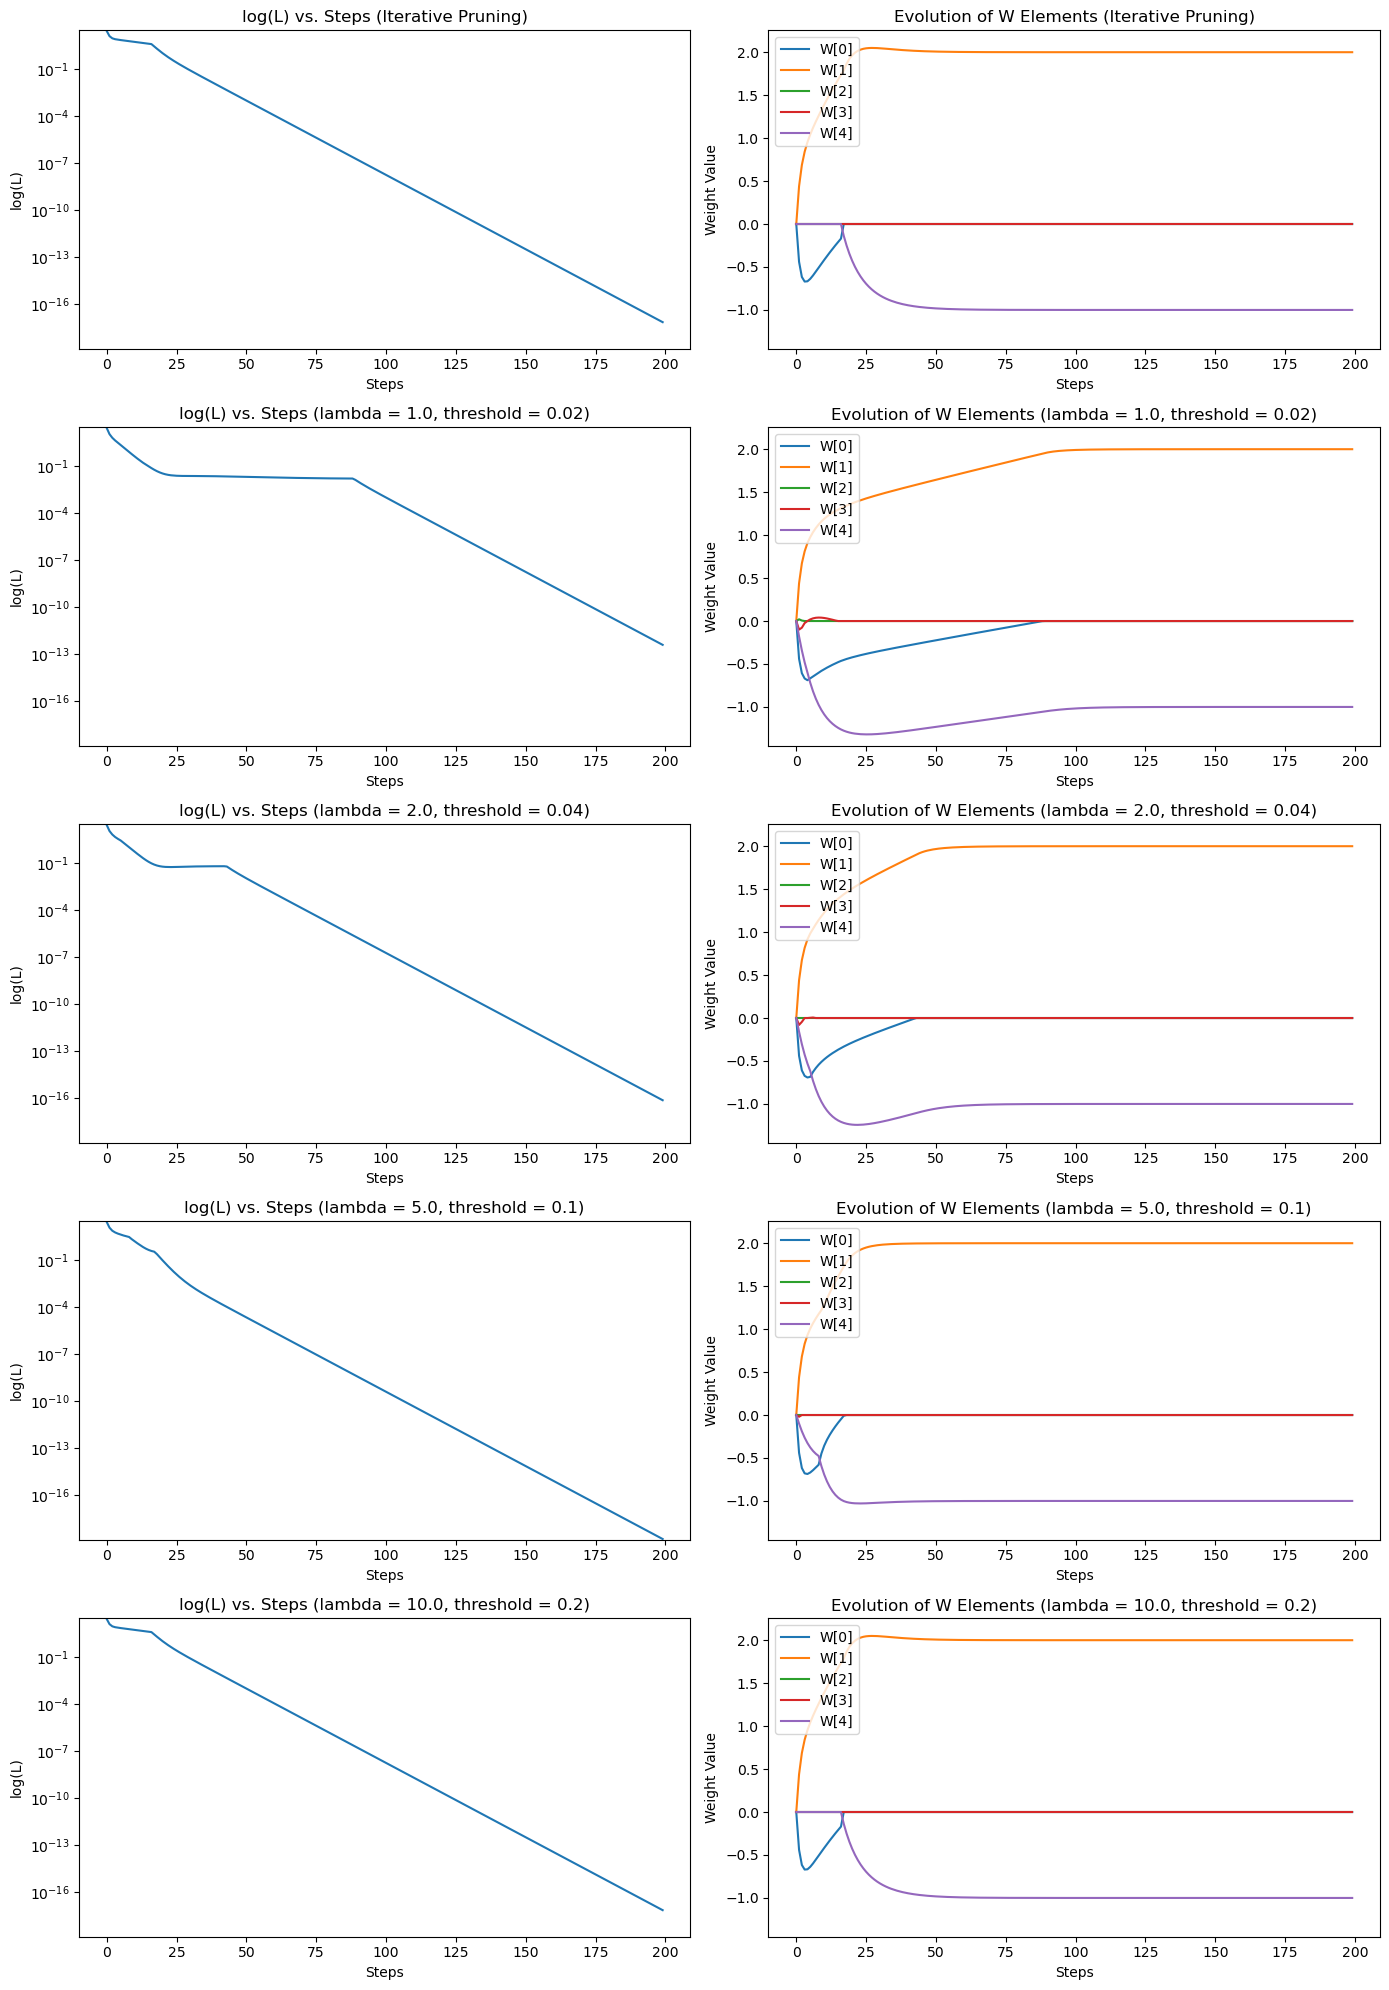

In [13]:
all_losses = [pruning_loss_history] + all_loss_history
all_weights = [pruning_weight_history] + all_weight_history

min_loss = min([min(losses) for losses in all_losses])
max_loss = max([max(losses) for losses in all_losses])

weight_arrays = [np.array(pruning_weight_history)]
for weights in all_weight_history:
    weight_arrays.append(np.array(weights))

min_weight = min([np.min(weights) for weights in weight_arrays])
max_weight = max([np.max(weights) for weights in weight_arrays])

min_weight = min_weight - 0.1 * abs(min_weight)
max_weight = max_weight + 0.1 * abs(max_weight)

fig, axs = plt.subplots(len(threshold_values) + 1, 2, figsize=(14, 4*(len(threshold_values) + 1)))

axs[0, 0].plot(range(steps), pruning_loss_history)
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel('Steps')
axs[0, 0].set_ylabel('log(L)')
axs[0, 0].set_title('log(L) vs. Steps (Iterative Pruning)')
axs[0, 0].set_ylim([min_loss * 0.9, max_loss * 1.1])

pruning_weight_history = np.array(pruning_weight_history)
for i in range(pruning_weight_history.shape[1]):
    axs[0, 1].plot(range(steps), pruning_weight_history[:, i], label=f'W[{i}]')
axs[0, 1].set_xlabel('Steps')
axs[0, 1].set_ylabel('Weight Value')
axs[0, 1].set_title('Evolution of W Elements (Iterative Pruning)')
axs[0, 1].legend()
axs[0, 1].set_ylim([min_weight, max_weight])

for idx, (lam, threshold) in enumerate(zip(lambda_values, threshold_values)):
    loss_history = all_loss_history[idx]
    weight_history = all_weight_history[idx]
    
    axs[idx + 1, 0].plot(range(steps), loss_history)
    axs[idx + 1, 0].set_yscale('log')
    axs[idx + 1, 0].set_xlabel('Steps')
    axs[idx + 1, 0].set_ylabel('log(L)')
    axs[idx + 1, 0].set_title(f'log(L) vs. Steps (lambda = {lam}, threshold = {threshold})')
    axs[idx + 1, 0].set_ylim([min_loss * 0.9, max_loss * 1.1])
    
    for i in range(weight_history.shape[1]):
        axs[idx + 1, 1].plot(range(steps), weight_history[:, i], label=f'W[{i}]')
    axs[idx + 1, 1].set_xlabel('Steps')
    axs[idx + 1, 1].set_ylabel('Weight Value')
    axs[idx + 1, 1].set_title(f'Evolution of W Elements (lambda = {lam}, threshold = {threshold})')
    axs[idx + 1, 1].legend()
    axs[idx + 1, 1].set_ylim([min_weight, max_weight])

plt.tight_layout()
plt.show()
